<a href="https://colab.research.google.com/github/artem-barsov/Diploma/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSPLIB95

In [ ]:
!pip install tsplib95
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed

In [ ]:
problems = ['ali535.tsp',    'd18512.tsp',     'gil262.tsp',   'kroB100.tsp',	'pla7397.tsp',   'rat783.tsp',   'tsp225.tsp',
'att48.tsp',     'd198.tsp',	     'gr120.tsp',	  'kroB150.tsp',	'pla85900.tsp',  'rat99.tsp',    'u1060.tsp',
'att532.tsp',    'd2103.tsp',      'gr137.tsp',	  'kroB200.tsp',	'pr1002.tsp',    'rd100.tsp',    'u1432.tsp',
'bayg29.tsp',    'd493.tsp',	     'gr17.tsp',	  'kroC100.tsp',	'pr107.tsp',     'rd400.tsp',    'u159.tsp',
'bays29.tsp',    'd657.tsp',	     'gr202.tsp',	  'kroD100.tsp',	'pr124.tsp',     'rl11849.tsp',  'u1817.tsp',
'berlin52.tsp',  'dantzig42.tsp',  'gr21.tsp',	  'kroE100.tsp',	'pr136.tsp',     'rl1304.tsp',   'u2152.tsp',
'bier127.tsp',   'dsj1000.tsp',    'gr229.tsp',	  'lin105.tsp',	'pr144.tsp',     'rl1323.tsp',   'u2319.tsp',
'brazil58.tsp',  'eil101.tsp',     'gr24.tsp',	  'lin318.tsp',	'pr152.tsp',     'rl1889.tsp',   'u574.tsp',
'brd14051.tsp',  'eil51.tsp',      'gr431.tsp',	  'linhp318.tsp',	'pr226.tsp',     'rl5915.tsp',   'u724.tsp',
'brg180.tsp',    'eil76.tsp',      'gr48.tsp',	  'nrw1379.tsp',	'pr2392.tsp',    'rl5934.tsp',   'ulysses16.tsp',
'burma14.tsp',   'fl1400.tsp',     'gr666.tsp',	  'p654.tsp',	'pr264.tsp',     'si1032.tsp',   'ulysses22.tsp',
'ch130.tsp',     'fl1577.tsp',     'gr96.tsp',	  'pa561.tsp',	'pr299.tsp',     'si175.tsp',    'usa13509.tsp',
'ch150.tsp',     'fl3795.tsp',     'hk48.tsp',	  'pcb1173.tsp',	'pr439.tsp',     'si535.tsp',    'vm1084.tsp',
'd1291.tsp',     'fl417.tsp',      'kroA100.tsp',  'pcb3038.tsp',	'pr76.tsp',      'st70.tsp',	   'vm1748.tsp',
'd15112.tsp',    'fnl4461.tsp',    'kroA150.tsp',  'pcb442.tsp',	'rat195.tsp',    'swiss42.tsp',
'd1655.tsp',     'fri26.tsp',      'kroA200.tsp',  'pla33810.tsp',	'rat575.tsp',    'ts225.tsp']
problems = [tsplib95.load('drive/MyDrive/TSP/problems/'+x) for x in problems]

In [ ]:
depictable_problems = sorted(list(filter(lambda x:x.is_depictable(), problems)), key=lambda x:x.dimension)
burma14 = depictable_problems[0]
eil76 = depictable_problems[10]
dantzig42 = depictable_problems[5]
berlin52 = depictable_problems[8]
att48 = depictable_problems[6]
print(len(depictable_problems))

98


In [ ]:
for i, dp in enumerate(depictable_problems):
    print(i, dp.dimension, dp.name, dp.edge_weight_type, dp.edge_weight_format)

0 14 burma14 GEO FUNCTION
1 16 ulysses16.tsp GEO None
2 22 ulysses22.tsp GEO None
3 29 bayg29 EXPLICIT UPPER_ROW
4 29 bays29 EXPLICIT FULL_MATRIX
5 42 dantzig42 EXPLICIT LOWER_DIAG_ROW
6 48 att48 ATT None
7 51 eil51 EUC_2D None
8 52 berlin52 EUC_2D None
9 70 st70 EUC_2D None
10 76 eil76 EUC_2D None
11 76 pr76 EUC_2D None
12 96 gr96 GEO None
13 99 rat99 EUC_2D None
14 100 kroB100 EUC_2D None
15 100 rd100 EUC_2D None
16 100 kroC100 EUC_2D None
17 100 kroD100 EUC_2D None
18 100 kroE100 EUC_2D None
19 100 kroA100 EUC_2D None
20 101 eil101 EUC_2D None
21 105 lin105 EUC_2D None
22 107 pr107 EUC_2D None
23 120 gr120 EXPLICIT LOWER_DIAG_ROW
24 124 pr124 EUC_2D None
25 127 bier127 EUC_2D None
26 130 ch130 EUC_2D None
27 136 pr136 EUC_2D None
28 137 gr137 GEO None
29 144 pr144 EUC_2D None
30 150 kroB150 EUC_2D None
31 150 ch150 EUC_2D None
32 150 kroA150 EUC_2D None
33 152 pr152 EUC_2D None
34 159 u159 EUC_2D None
35 195 rat195 EUC_2D None
36 198 d198 EUC_2D None
37 200 kroB200 EUC_2D None
38 20

# RL

In [ ]:
!pip install stable_baselines3
!pip install shimmy
!pip install gymnasium==0.29.1
import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO
import math
import itertools
import datetime
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env as sb_check_env
from gymnasium.utils.env_checker import check_env as gym_check_env
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
N = 12
nenv = 200
Ms = []
rand = np.random.RandomState(1)
M = np.round(rand.normal(5, 1.5, size=(N, N)),2)
M[np.eye(N)==1] = 0
for i in range(nenv):
    Ms.append(np.round(rand.normal(5, 1.5, size=(N, N)),2))
    Ms[-1][np.eye(N)==1] = 0
print(np.array(Ms))

[[[ 0.    5.21  5.12 ...  8.28  5.66  4.85]
  [ 4.8   0.    5.03 ...  4.74  6.48  5.32]
  [ 8.29  2.16  0.   ...  4.57  6.02  4.52]
  ...
  [ 0.81  7.91  5.55 ...  0.    6.19  4.44]
  [ 5.2   6.8   5.43 ...  6.33  0.    3.7 ]
  [ 2.84  6.85  4.62 ...  5.32  5.02  0.  ]]

 [[ 0.    5.12  4.72 ...  6.18  3.57  5.88]
  [ 8.1   0.    3.75 ...  4.1   6.69  5.46]
  [ 7.08  4.01  0.   ...  3.8   5.42  3.76]
  ...
  [ 2.19  6.38  4.95 ...  0.    1.79  3.75]
  [ 5.68  6.66  4.58 ...  6.67  0.    1.86]
  [ 4.66  7.42  4.44 ...  4.36  6.81  0.  ]]

 [[ 0.    4.85  6.72 ...  2.47  3.26  7.03]
  [ 4.5   0.    3.72 ...  3.92  6.65  3.65]
  [ 3.77  6.08  0.   ...  4.84  5.68  7.65]
  ...
  [ 4.36  3.9   2.65 ...  0.    4.73  2.73]
  [ 6.52  2.79  4.79 ...  4.79  0.    5.82]
  [ 2.54 10.94  5.97 ...  7.78  5.21  0.  ]]

 ...

 [[ 0.    6.5   5.42 ...  4.79  3.6   5.04]
  [ 6.61  0.    8.68 ...  6.81  3.41  4.47]
  [ 5.36  3.46  0.   ...  5.64  7.06  2.85]
  ...
  [ 2.47  5.03  7.93 ...  0.    2.94  1.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class WrapTSPLIB:
    def __init__(self, M):
        self.M = M
    def __getitem__(self, uv):
        return self.M.get_weight(uv[0]+1, uv[1]+1)
    def __len__(self):
        return self.M.dimension

## Решение перебором $O(n!)$

0 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) 60.02
3991680 (0, 1, 8, 11, 5, 9, 7, 2, 10, 4, 6, 3) 40.39
7983360 (0, 1, 8, 11, 5, 9, 7, 2, 10, 4, 6, 3) 40.39
11975040 (0, 1, 8, 11, 5, 9, 7, 2, 10, 4, 6, 3) 40.39
15966720 (0, 1, 8, 11, 5, 9, 7, 2, 10, 4, 6, 3) 40.39
19958400 (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11) 38.35
23950080 (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11) 38.35
27941760 (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11) 38.35
31933440 (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11) 38.35
35925120 (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11) 38.35
min g = 38.35
avg g = 61.24000000000011
med g = 61.239999999999995
max g = 82.52
Optimal solution: (0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11), weight = 38.35, time = 0:08:57.032867


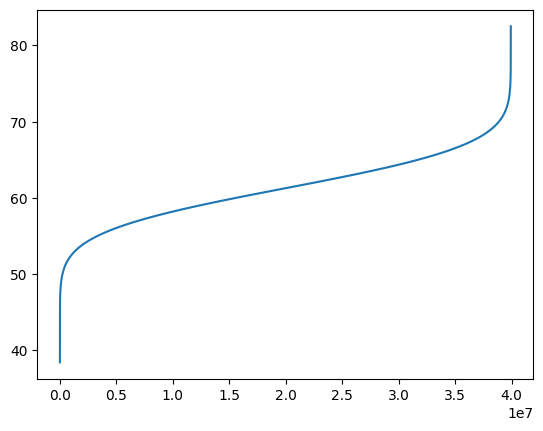

In [ ]:
x_min = []
g_min = 100000000
t1 = datetime.datetime.now()
gs = []
for i, x in enumerate(itertools.permutations(range(1,N), N-1)):
    x = (0,) + x
    g = np.sum(M[x[:-1], x[1:]])+M[x[-1], x[0]]
    gs.append(g)
    if g < g_min:
        g_min = g
        x_min = x
    if i % (math.factorial(N-1)/10) == 0:
        print(i, x_min, g_min)
t2 = datetime.datetime.now()

gs = sorted(gs)

print(f'min g = {g_min}')
print(f'avg g = {np.mean(gs)}')
print(f'med g = {np.median(gs)}')
print(f'max g = {gs[-1]}')
print(f'Optimal solution: {x_min}, weight = {g_min}, time = {t2-t1}')
plt.plot(gs)

## Жадное решение: ближайший сосед

In [ ]:
def nearest_neighbour(M):
    M = np.array([[M[i,j] for j in range(len(M))] for i in range(len(M))])
    path = [0]
    x = 0
    for i in range(len(M)-1):
        vars = sorted(list(enumerate(M[path[-1]])), key=lambda x:x[1])
        for v,_ in vars:
            if v not in path:
                x += M[path[-1], v]
                path.append(v)
    x += M[path[-1], 0]
    path.append(0)
    return x, path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24640


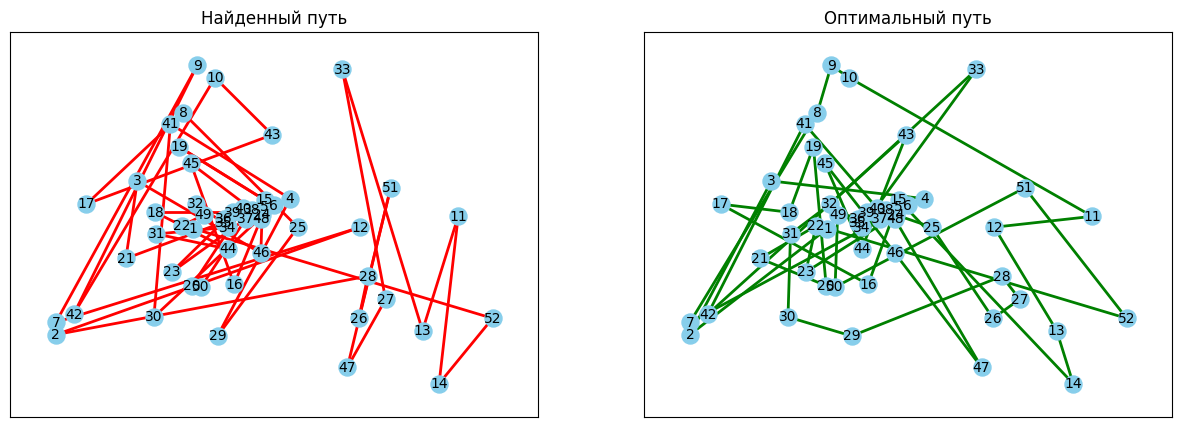

In [ ]:
ans = nearest_neighbour(WrapTSPLIB(berlin52))
print(ans[0])
display_solution(berlin52, ans[1])

## Метод ветвей и границ

In [ ]:
import math
maxsize = float('inf')
def copyToFinal(curr_path):
	final_path[:N + 1] = curr_path[:]
	final_path[N] = curr_path[0]

def firstMin(adj, i):
	min = maxsize
	for k in range(N):
		if adj[i][k] < min and i != k:
			min = adj[i][k]
	return min

def secondMin(adj, i):
	first, second = maxsize, maxsize
	for j in range(N):
		if i == j:
			continue
		if adj[i][j] <= first:
			second = first
			first = adj[i][j]
		elif(adj[i][j] <= second and
			adj[i][j] != first):
			second = adj[i][j]
	return second

def TSPRec(adj, curr_bound, curr_weight,
			level, curr_path, visited):
	global final_res
	if level == N:
		if adj[curr_path[level - 1]][curr_path[0]] != 0:
			curr_res = curr_weight + adj[curr_path[level - 1]]\
										[curr_path[0]]
			if curr_res < final_res:
				copyToFinal(curr_path)
				final_res = curr_res
		return
	for i in range(N):
		if (adj[curr_path[level-1]][i] != 0 and
							visited[i] == False):
			temp = curr_bound
			curr_weight += adj[curr_path[level - 1]][i]
			if level == 1:
				curr_bound -= ((firstMin(adj, curr_path[level - 1]) +
								firstMin(adj, i)) / 2)
			else:
				curr_bound -= ((secondMin(adj, curr_path[level - 1]) +
								firstMin(adj, i)) / 2)
			if curr_bound + curr_weight < final_res:
				curr_path[level] = i
				visited[i] = True
				TSPRec(adj, curr_bound, curr_weight,
					level + 1, curr_path, visited)
			curr_weight -= adj[curr_path[level - 1]][i]
			curr_bound = temp
			visited = [False] * len(visited)
			for j in range(level):
				if curr_path[j] != -1:
					visited[curr_path[j]] = True

def TSP(adj):
	curr_bound = 0
	curr_path = [-1] * (N + 1)
	visited = [False] * N
	for i in range(N):
		curr_bound += (firstMin(adj, i) +
					secondMin(adj, i))
	curr_bound = math.ceil(curr_bound / 2)
	visited[0] = True
	curr_path[0] = 0
	TSPRec(adj, curr_bound, 0, 1, curr_path, visited)

# adj = [[0, 10, 15, 20],
# 	[10, 0, 35, 25],
# 	[15, 35, 0, 30],
# 	[20, 25, 30, 0]]
# N = 4
M = WrapTSPLIB(berlin52)
adj = [[M[i,j] for j in range(len(M))] for i in range(len(M))]
N = len(adj)



final_path = [None] * (N + 1)
visited = [False] * N
final_res = maxsize
TSP(adj)
print("Minimum cost :", final_res)
print("Path Taken : ", end = ' ')
for i in range(N + 1):
	print(final_path[i], end = ' ')
display_solution(berlin52, final_path, final_path[:-1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Реализация фиксированной среды для обучения агента

In [ ]:
class MyEnv(gym.Env):
    def __init__(self, M):
        super().__init__()
        self.n = len(M)
        self.init_M = np.array([[M[i,j] for j in range(self.n)] for i in range(self.n)])
        self.M = self._normalize_matrix(self.init_M)
        self.penalty = 2
        self.action_space = gym.spaces.Discrete(self.n)
        self.observation_space = gym.spaces.Dict({
            'visited': gym.spaces.MultiBinary(self.n),
            'last': gym.spaces.Discrete(self.n),
            'distances': gym.spaces.Box(self.M.min(), self.M.max(), (self.n,), dtype=np.float64)
            # 'distances': gym.spaces.Box(self.M.min(), self.M.max(), (self.n,self.n,), dtype=np.float64)
            })
        self.cum_rewards = []
        self.path_dists = []
        self.best_solution = (np.inf, [])

    def _normalize_matrix(self, M):
        return (M - M.min()) / (M.max() - M.min())

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = {'visited': np.zeros(self.n, dtype='?'),
        # tmp = np.random.randint(2, size=(self.n,), dtype='?')
        # self.state = {'visited': tmp,
                      'last': 0,
                    #   'last': np.argwhere(tmp == 1)[np.random.choice(sum(tmp))][0] if sum(tmp)>0 else 0,
                      'distances': self.M[0]
                    #   'distances': self.M
                      }
        self.state['visited'][self.state['last']] = 1
        self.cum_reward = 0
        self.path = [0]
        return self.state, {}

    def step(self, action):
        if self.state['visited'][action] == 1:
            self.reward = -self.penalty
        else:
            self.state['visited'][action] = 1
            self.reward = - self.M[self.state['last'], action]
            self.state['last'] = action
            self.state['distances'] = self.M[action]
            self.path.append(action)
        self.cum_reward += self.reward
        if np.all(self.state['visited'] == 1):
            self.reward += - self.M[action, 0]
            self.reward += 2*self.penalty
            self.cum_reward += self.reward
            self.cum_rewards.append(self.cum_reward)
            self.path.append(0)
            self.path_dists.append(np.sum(self.init_M[self.path[:-1], self.path[1:]]))
            if self.best_solution[0] > self.path_dists[-1]:
                self.best_solution = (self.path_dists[-1], self.path)
            self.done = True
        else:
            self.done = False
        return self.state, self.reward, False, self.done, {}

# Проверить свою кастомную среду и вывести предупреждения при обнаружении
sb_check_env(MyEnv(M))
gym_check_env(MyEnv(M))

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/env_checker.py:321: UserWarning: WARN: Not able to test alternative render modes due to the environment not having a spec. Try instantialising the environment through gymnasium.make
  logger.warn(


In [ ]:
def print_stats(env):
    print(f'Всего финишей: {len(env.path_dists)}')
    print('Лучшее решение:', list(map(lambda x:x+1, env.best_solution[1])), ', g =', env.best_solution[0])

def display_learning(env):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4))
    axes[0].set_title("График обучения")
    axes[0].set_ylabel('Накопленные награды')
    axes[0].set_xlabel('Номер эпизода')
    axes[0].plot(env.cum_rewards)
    axes[1].set_title("График обучения")
    axes[1].set_ylabel('Длина пути')
    axes[1].set_xlabel('Номер эпизода')
    axes[1].plot(env.path_dists)

def display_solution(problem, path, optim=None):
    if not optim:
        optim = [x-1 for x in problem.get_nodes()]
    graph = problem.get_graph()
    pos = problem.display_data or problem.node_coords
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title("Найденный путь")
    edges = [(path[i]+1, path[i+1]+1) for i in range(len(path)-1)]
    nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[0])
    nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[0])
    nx.draw_networkx_edges(graph, pos=pos, edgelist=edges, edge_color='red', width=2, ax=axes[0])
    axes[1].set_title("Оптимальный путь")
    edges_canon = [(optim[i]+1, optim[i+1]+1) for i in range(len(optim)-1)] + [(1, optim[-1]+1)]
    nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[1])
    nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[1])
    nx.draw_networkx_edges(graph, pos=pos, edgelist=edges_canon, edge_color='green', width=2, ax=axes[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Обучение на простой среде

Output()

time = 0:03:28.491729
Всего финишей: 6059
Лучшее решение: [1, 6, 11, 5, 7, 4, 10, 8, 3, 2, 9, 12, 1] , g = 38.35


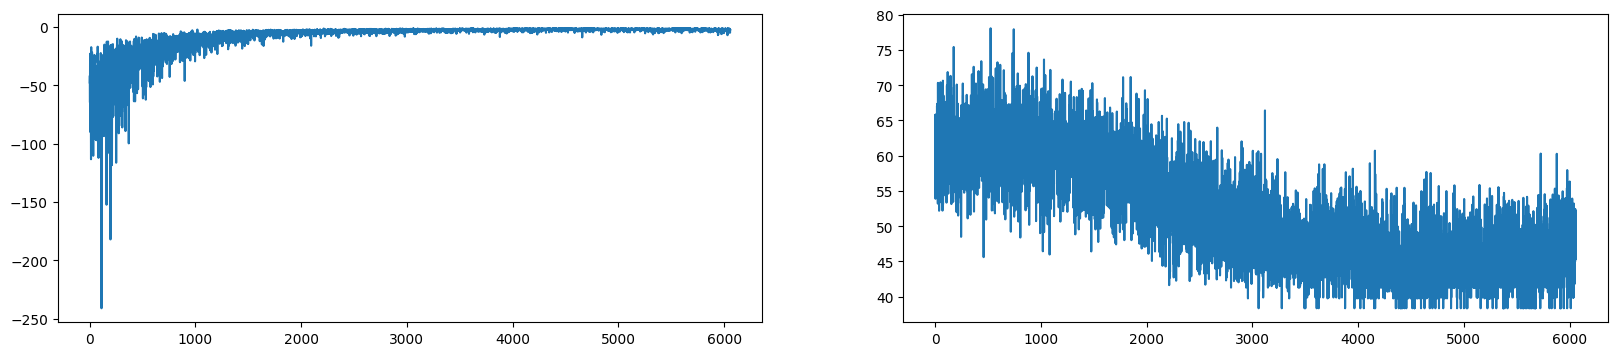

In [ ]:
env = MyEnv(M)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=80000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)

In [ ]:
obs, _ = env.reset()
g = 0
actions = [0]
for i in range(len(M)):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, _, done, info = env.step(action)
    g += M[actions[-1], action]
    actions.append(action)
    if done:
        obs,_ = env.reset()
        g += M[actions[-1], 0]
        print(f"{list(map(int, actions))}, g = {g}")
        break
env.close()

[0, 5, 10, 4, 6, 3, 9, 7, 2, 1, 8, 11], g = 38.35


## Обучение на чуть большем графе с большими расстояниями

Output()

time = 0:03:00.698995
Всего финишей: 4976
Лучшее решение: [1, 14, 13, 11, 2, 12, 10, 8, 9, 3, 5, 7, 6, 4, 1] , g = 6802.186146059882


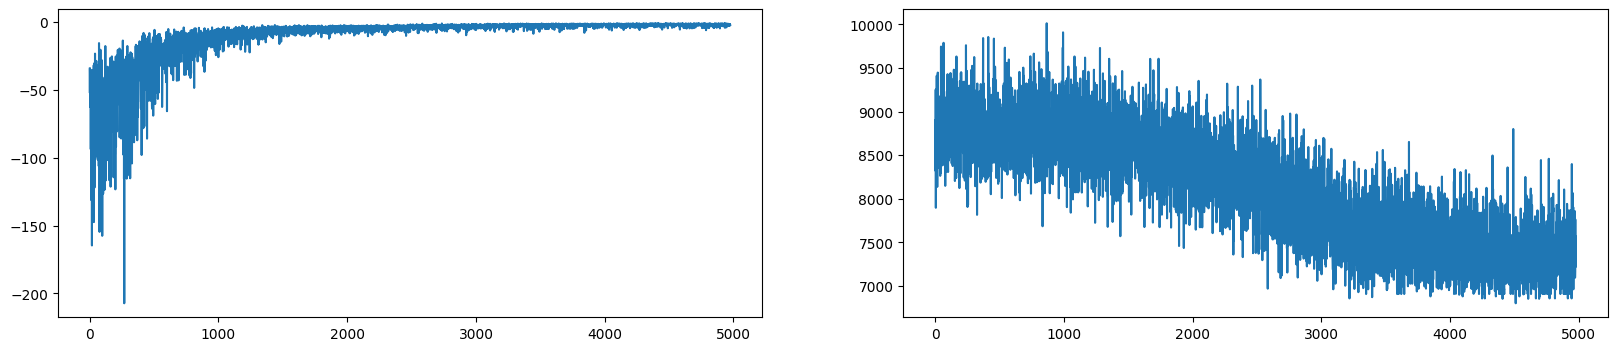

In [ ]:
Ma = abs(rand.normal(640, 100, size=(14, 14)))
env = MyEnv(Ma)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=80000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)

## Обучение на burma14

Output()

time = 0:03:21.993709
Всего финишей: 4997
Лучшее решение: [1, 2, 14, 3, 4, 5, 6, 12, 7, 13, 9, 10, 11, 8, 1] , g = 3381


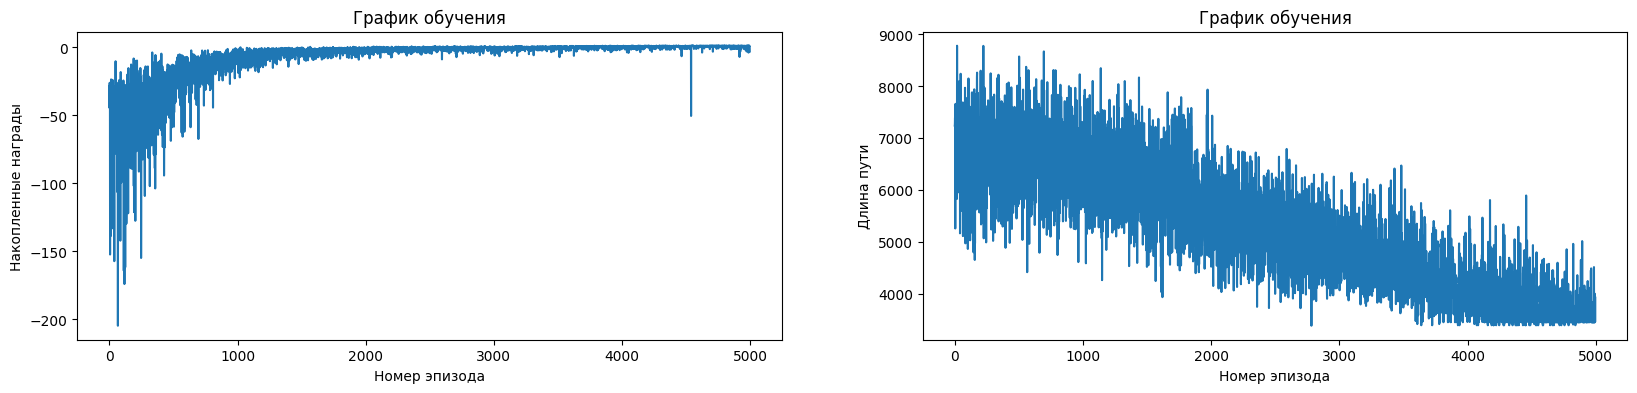

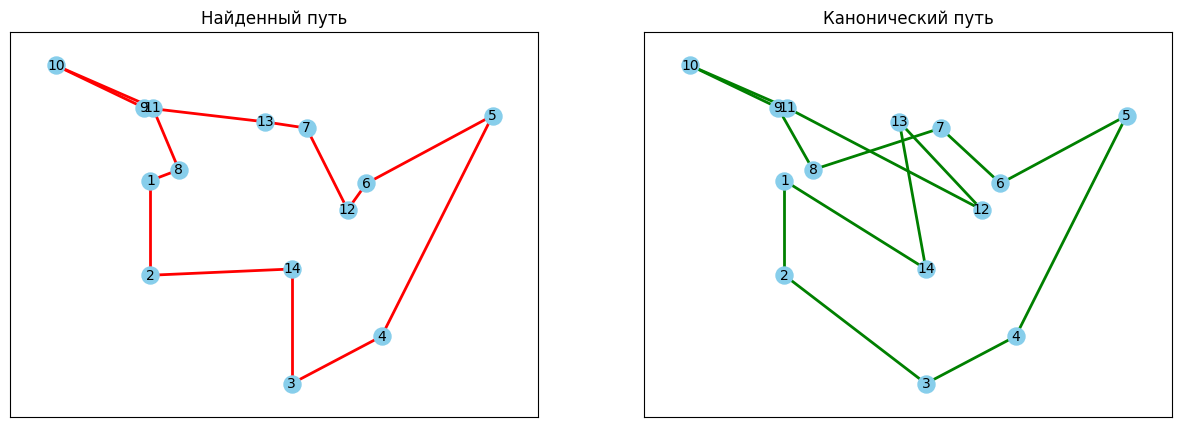

In [ ]:
gra = WrapTSPLIB(burma14)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=80000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)
display_solution(burma14, env.best_solution[1])

## Обучение на dantzig42

Output()

time = 0:19:02.869247
Всего финишей: 9207
Лучшее решение: [1, 41, 40, 39, 3, 4, 8, 5, 38, 36, 37, 34, 33, 32, 31, 9, 24, 26, 29, 22, 17, 20, 23, 11, 21, 19, 18, 16, 14, 15, 13, 25, 27, 28, 6, 10, 12, 30, 35, 7, 2, 42, 1] , g = 1243


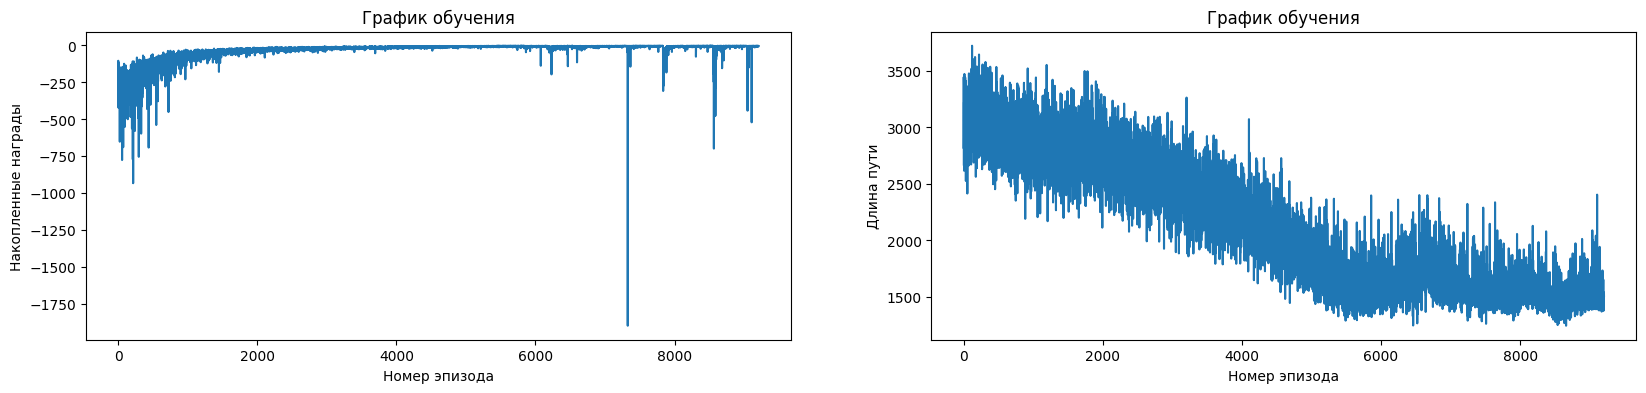

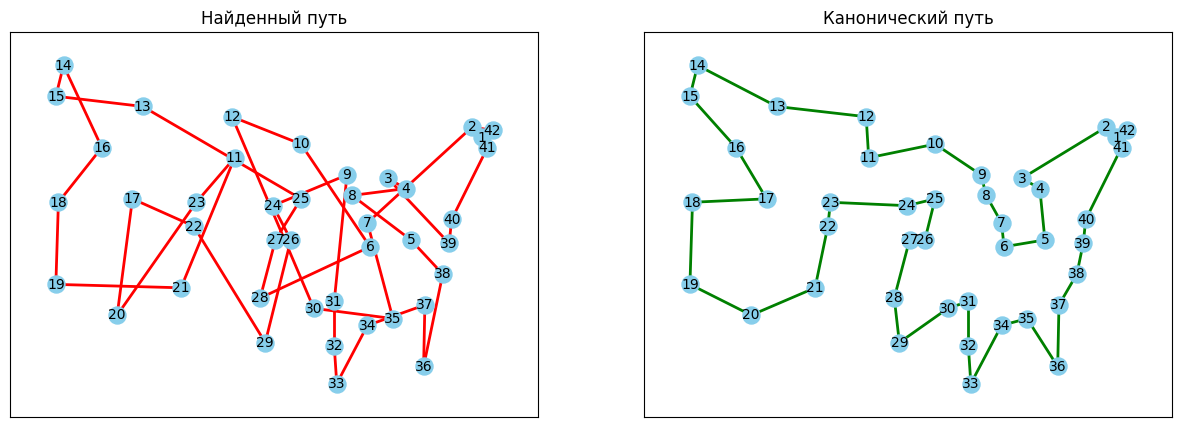

In [ ]:
gra = WrapTSPLIB(dantzig42)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=500000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)
display_solution(dantzig42, env.best_solution[1])

Output()

time = 0:44:44.818143
Всего финишей: 10213
Лучшее решение: [1, 42, 3, 4, 7, 6, 34, 35, 37, 41, 40, 39, 36, 32, 33, 31, 30, 28, 21, 22, 25, 24, 27, 23, 17, 20, 19, 18, 16, 14, 15, 13, 10, 26, 12, 11, 29, 8, 9, 5, 38, 2, 1] , g = 1101


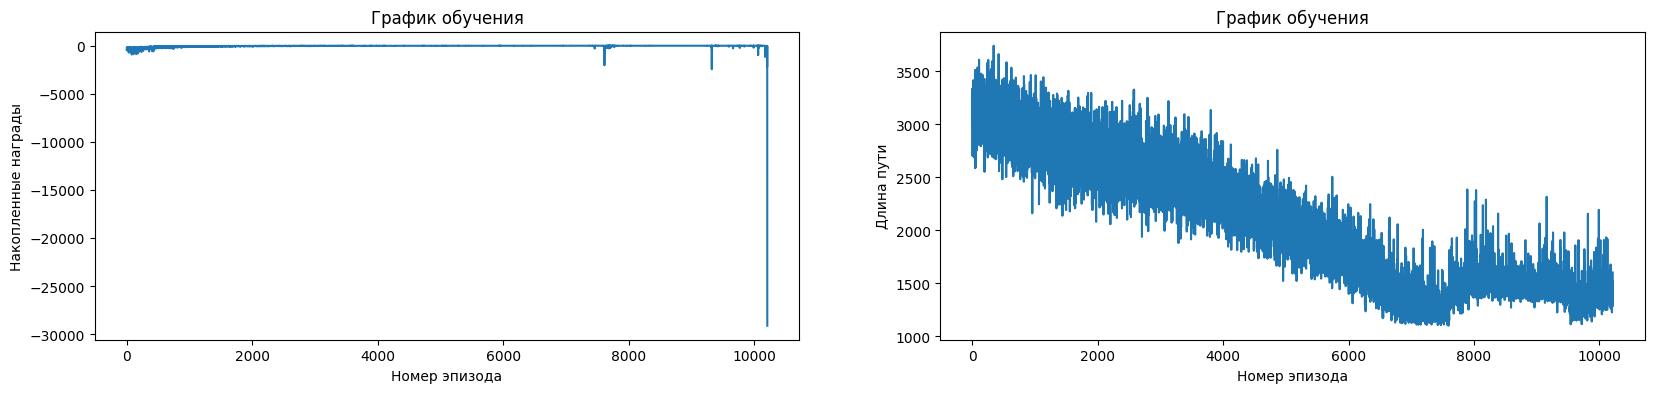

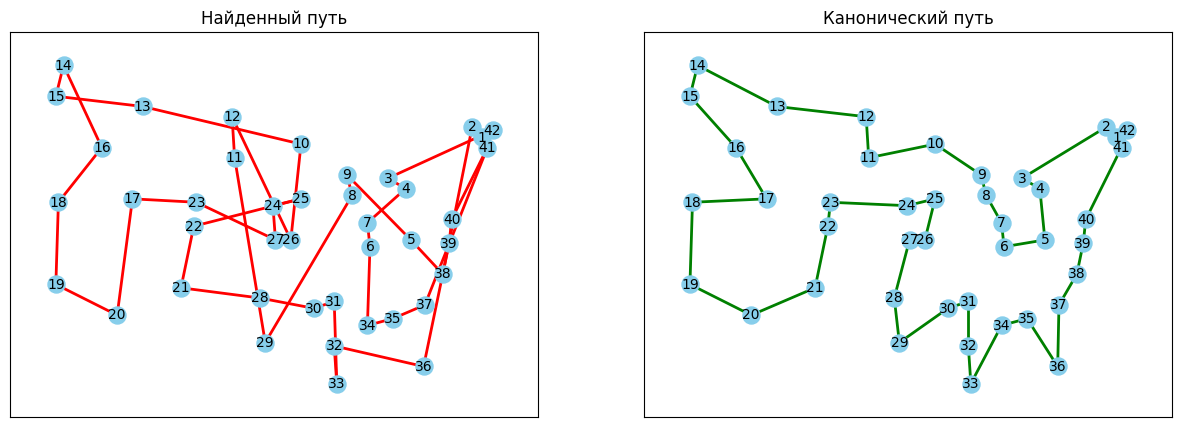

In [ ]:
gra = WrapTSPLIB(dantzig42)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=1000000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)
display_solution(dantzig42, env.best_solution[1])

Output()

time = 0:00:18.360395
Всего финишей: 30
Лучшее решение: [1, 24, 40, 7, 8, 38, 37, 21, 15, 20, 42, 17, 26, 10, 6, 41, 2, 29, 22, 5, 34, 32, 18, 31, 36, 28, 27, 23, 13, 16, 9, 33, 30, 14, 3, 11, 19, 25, 4, 35, 12, 39, 1] , g = 2881


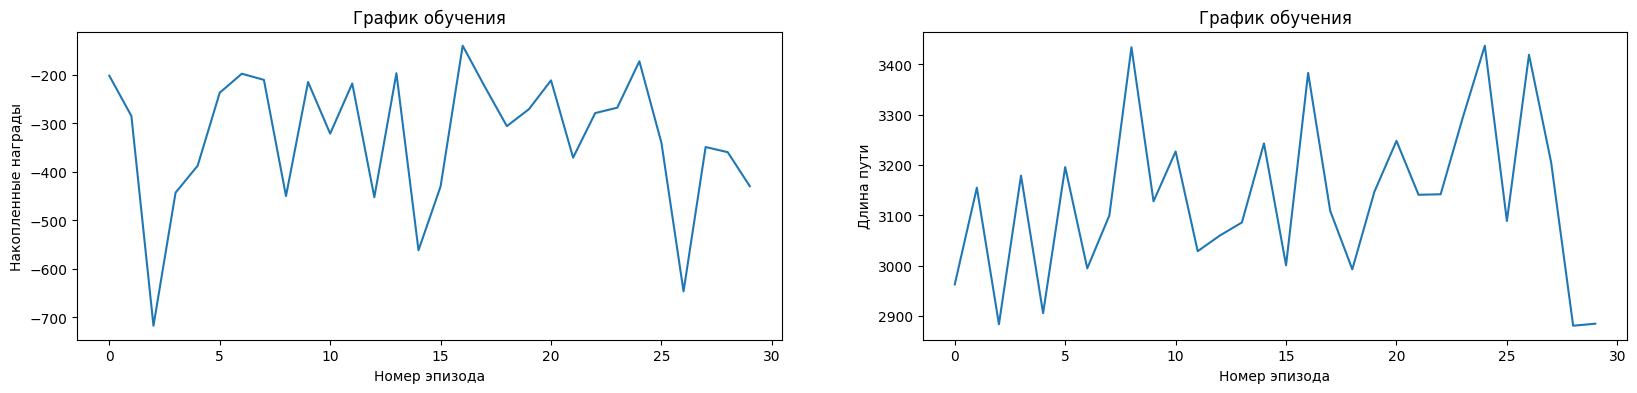

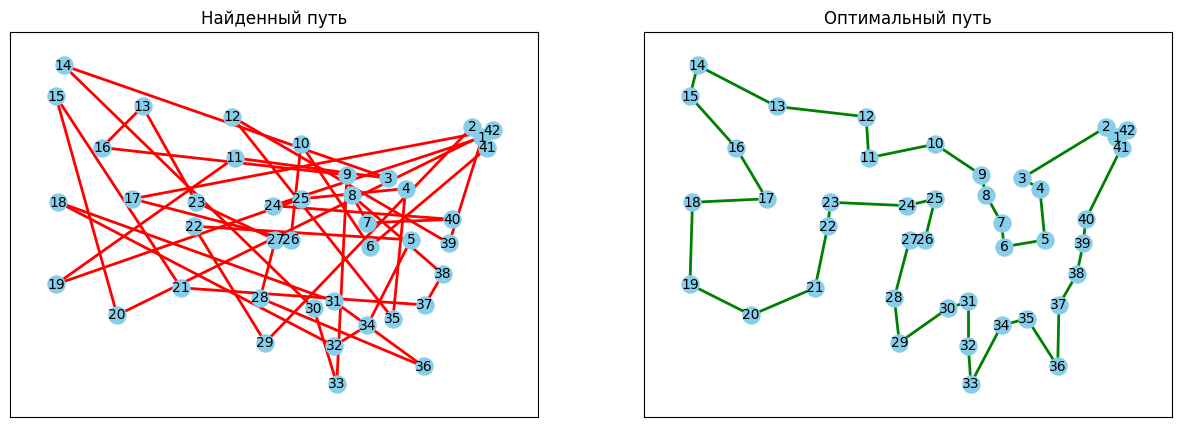

In [ ]:
gra = WrapTSPLIB(dantzig42)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=5000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)
display_solution(dantzig42, env.best_solution[1])

## Обучение на eil76

Output()

time = 0:10:47.307630
Всего финишей: 1930
Минимальный встреченный путь: 787.0


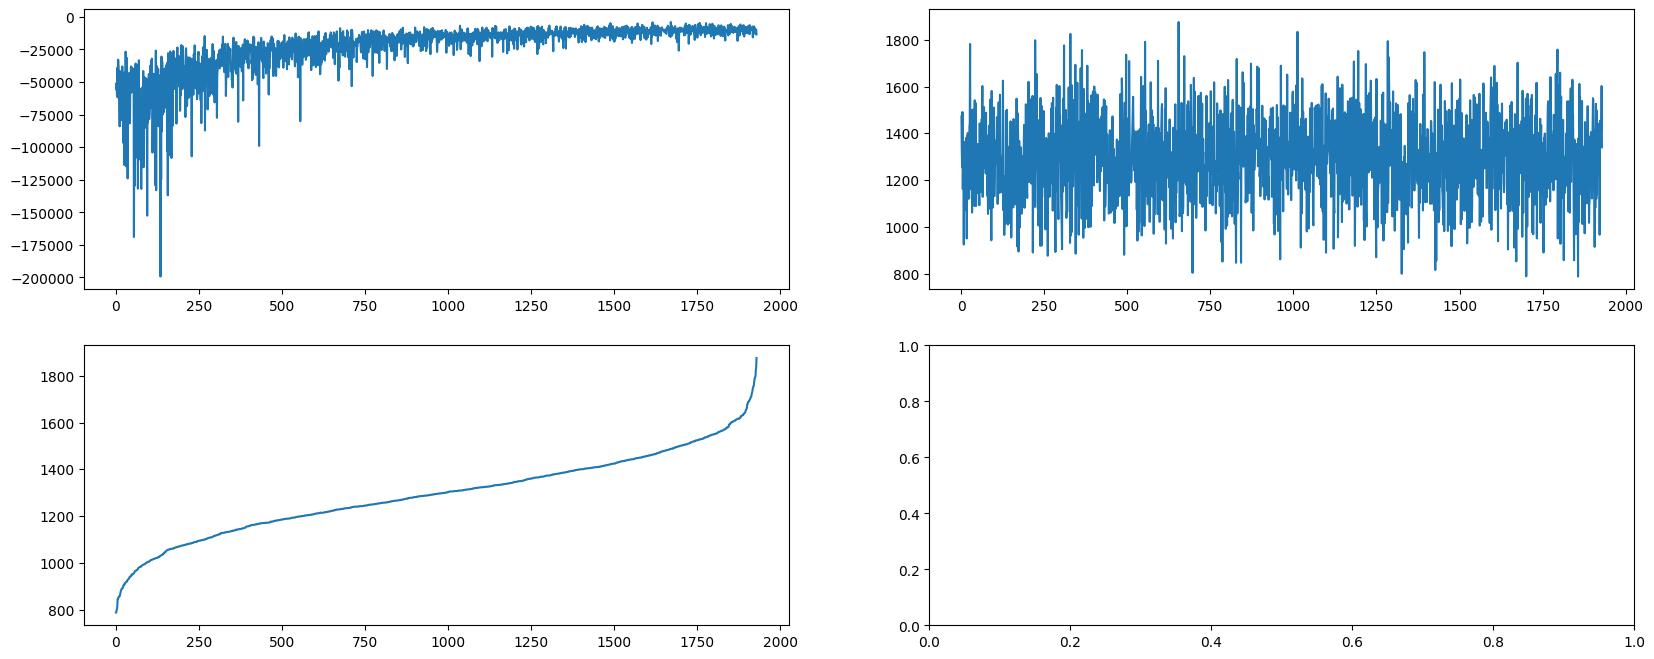

In [ ]:
gra = WrapTSPLIB(eil76)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=320000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes[0][0].plot(env.cum_rewards)
axes[0][1].plot(env.path_dists)
axes[1][0].plot(sorted(env.path_dists))
print(f'Всего финишей: {len(env.path_dists)}')
print(f'Минимальный встреченный путь: {min(env.path_dists)}')

In [ ]:
obs,_ = env.reset()
env.state['visited'] = np.zeros(env.n, dtype='?')
env.state['last'] = 0
g = 0
actions = [0]
for i in range(env.n):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, _, done, info = env.step(action)
    g += gra[actions[-1], action]
    actions.append(action)
    if done:
        obs,_ = env.reset()
        g += gra[actions[-1], 0]
        print(f"{list(map(int, actions))}, g = {g}")
        break
env.close()

## Обучение на berlin52

In [ ]:
gra = WrapTSPLIB(berlin52)
env = MyEnv(gra)
model = PPO("MultiInputPolicy", env, verbose=0)

In [ ]:
t1 = datetime.datetime.now()
for i in range(50):
    print(f'{i}:', end='')
    model.learn(total_timesteps=80000, progress_bar=True)
    model.save('saved/berlin52.zip')
t2 = datetime.datetime.now()
print("time =", t2-t1)

Всего финишей: 10846

Минимальный встреченный путь: 13264.0

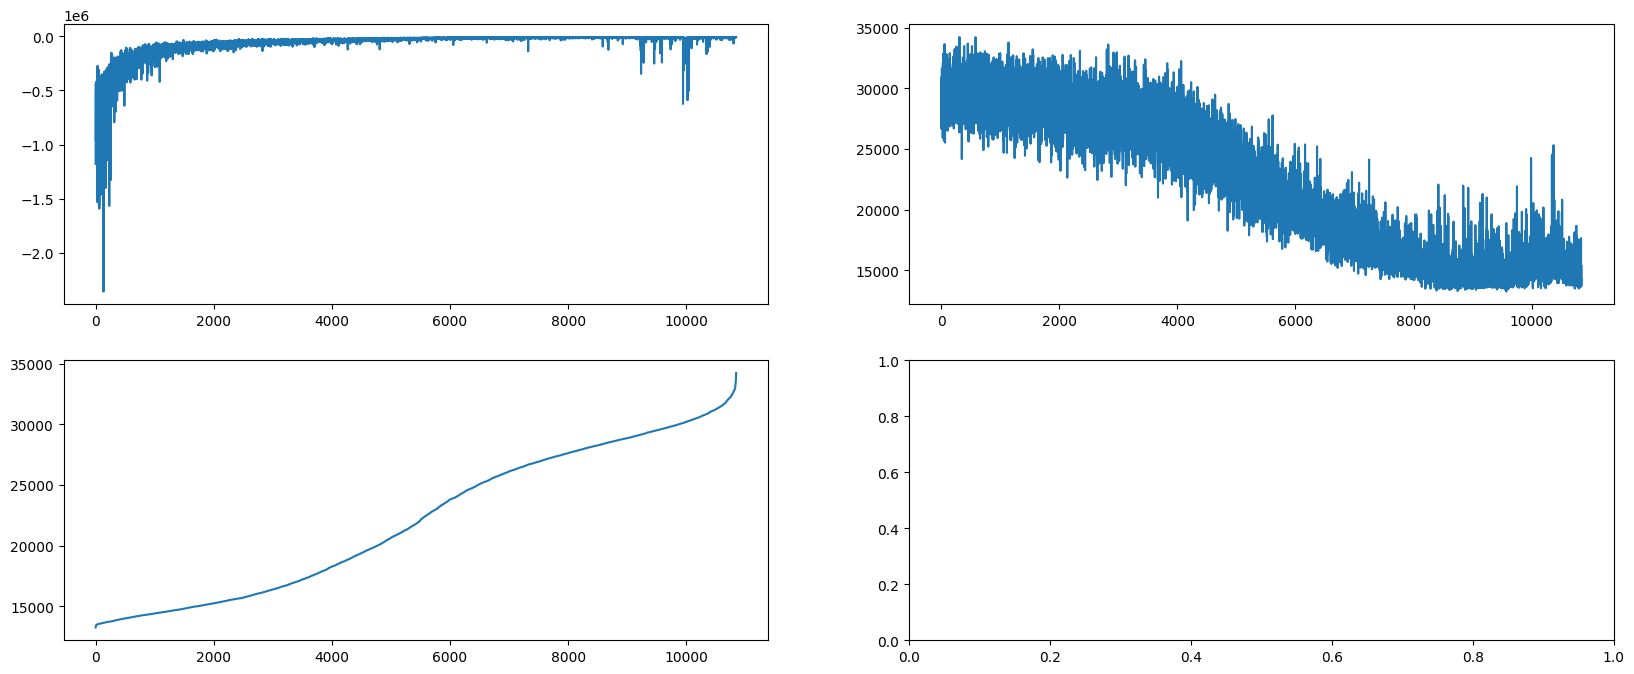

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes[0][0].plot(env.cum_rewards)
axes[0][1].plot(env.path_dists)
axes[1][0].plot(sorted(env.path_dists))
print(f'Всего финишей: {len(env.path_dists)}')
print(f'Минимальный встреченный путь: {min(env.path_dists)}')

[0, 4, 33, 25, 39, 37, 5, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 
25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25], g = 2331

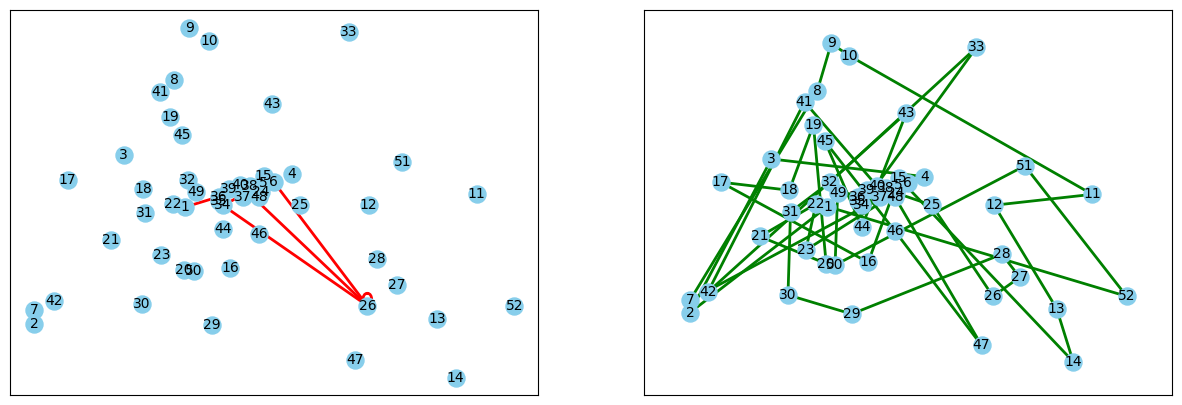

In [ ]:
obs,_ = env.reset()
g = 0
actions = [0]
for i in range(env.n):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, _, done, info = env.step(action)
    g += gra[actions[-1], action]
    actions.append(action)
    if done:
        obs,_ = env.reset()
        g += gra[actions[-1], 0]
        break
env.close()
print(f"{list(map(int, actions))}, g = {g}")

graph = berlin52.get_graph()
pos = berlin52.display_data or berlin52.node_coords
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
edges = [(actions[i]+1, actions[i+1]+1) for i in range(len(actions)-1)]
nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[0])
nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[0])
nx.draw_networkx_edges(graph, pos=pos, edgelist=edges, edge_color='red', width=2, ax=axes[0])
edges_canon = [(list(berlin52.get_nodes())[i], list(berlin52.get_nodes())[i+1]) for i in range(len(list(berlin52.get_nodes()))-1)] + [(1, list(berlin52.get_nodes())[-1])]
nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[1])
nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[1])
nx.draw_networkx_edges(graph, pos=pos, edgelist=edges_canon, edge_color='green', width=2, ax=axes[1])

## Обучение на att48

Output()

time = 0:17:23.378818
Всего финишей: 4367
Минимальный встреченный путь: 30918.0


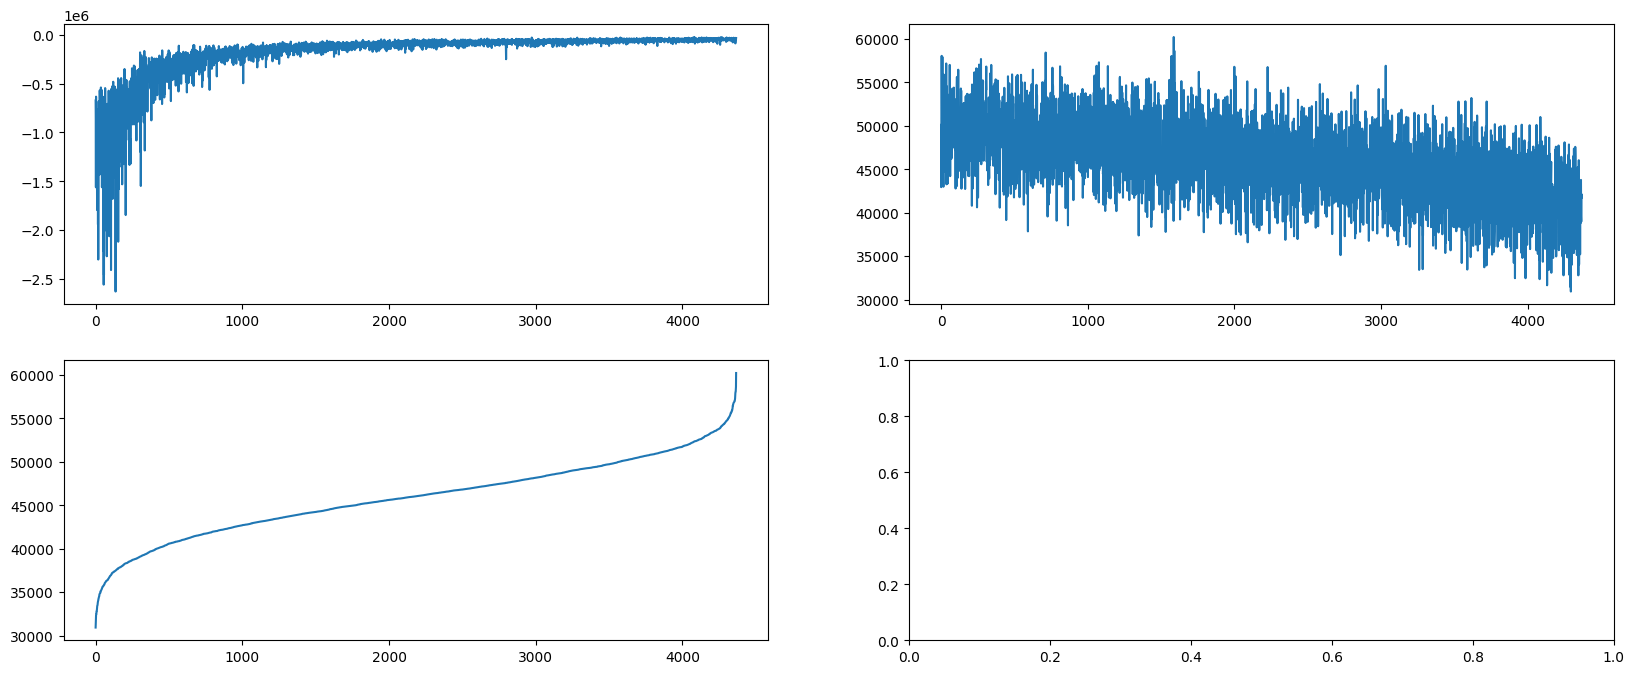

In [ ]:
gra = WrapTSPLIB(att48)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=320000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes[0][0].plot(env.cum_rewards)
axes[0][1].plot(env.path_dists)
axes[1][0].plot(sorted(env.path_dists))
print(f'Всего финишей: {len(env.path_dists)}')
print(f'Минимальный встреченный путь: {min(env.path_dists)}')

[0, 8, 15, 33, 38, 24, 31, 9, 1, 28, 14, 27, 2, 17, 18, 26, 32, 10, 29, 6, 37, 11, 34, 23, 12, 46, 13, 4, 40, 35, 36, 42, 44, 41, 25, 47, 39, 20, 45, 7, 43, 16, 19, 5, 30, 3, 22, 21], g = 33831


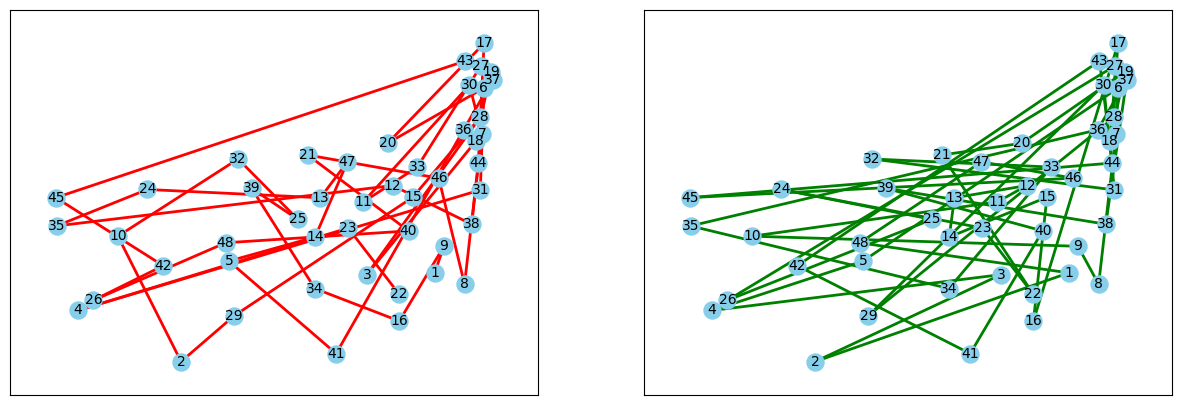

In [ ]:
obs,_ = env.reset()
g = 0
actions = [0]
for i in range(env.n):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, _, done, info = env.step(action)
    g += gra[actions[-1], action]
    actions.append(action)
    if done:
        obs,_ = env.reset()
        g += gra[actions[-1], 0]
        break
env.close()
print(f"{list(map(int, actions))}, g = {g}")

graph = att48.get_graph()
pos = att48.display_data or att48.node_coords
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
edges = [(actions[i]+1, actions[i+1]+1) for i in range(len(actions)-1)]
nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[0])
nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[0])
nx.draw_networkx_edges(graph, pos=pos, edgelist=edges, edge_color='red', width=2, ax=axes[0])
edges_canon = [(list(att48.get_nodes())[i], list(att48.get_nodes())[i+1]) for i in range(len(list(att48.get_nodes()))-1)] + [(1, list(att48.get_nodes())[-1])]
nx.draw_networkx_nodes(graph, pos=pos, node_size=150, node_color="skyblue", ax=axes[1])
nx.draw_networkx_labels(graph, pos=pos, font_size=10, ax=axes[1])
nx.draw_networkx_edges(graph, pos=pos, edgelist=edges_canon, edge_color='green', width=2, ax=axes[1])

## Обучение на множестве сред berlin52

In [ ]:
vec_env_train = DummyVecEnv([lambda: MyEnv(WrapTSPLIB(berlin52))] * 50)
gra = WrapTSPLIB(berlin52)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", vec_env_train, verbose=0, device=('cuda' if torch.cuda.is_available() else 'cpu'))
model.learn(total_timesteps=3800000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

Output()

time = 1:01:05.184237


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Всего финишей: 1261
Лучшее решение: [1, 44, 34, 49, 18, 50, 20, 48, 6, 24, 39, 38, 15, 5, 40, 36, 35, 37, 46, 23, 29, 16, 26, 47, 27, 28, 13, 14, 52, 11, 51, 12, 25, 4, 43, 33, 10, 9, 41, 8, 19, 3, 17, 42, 2, 7, 30, 21, 31, 32, 45, 22, 1] , g = 10067


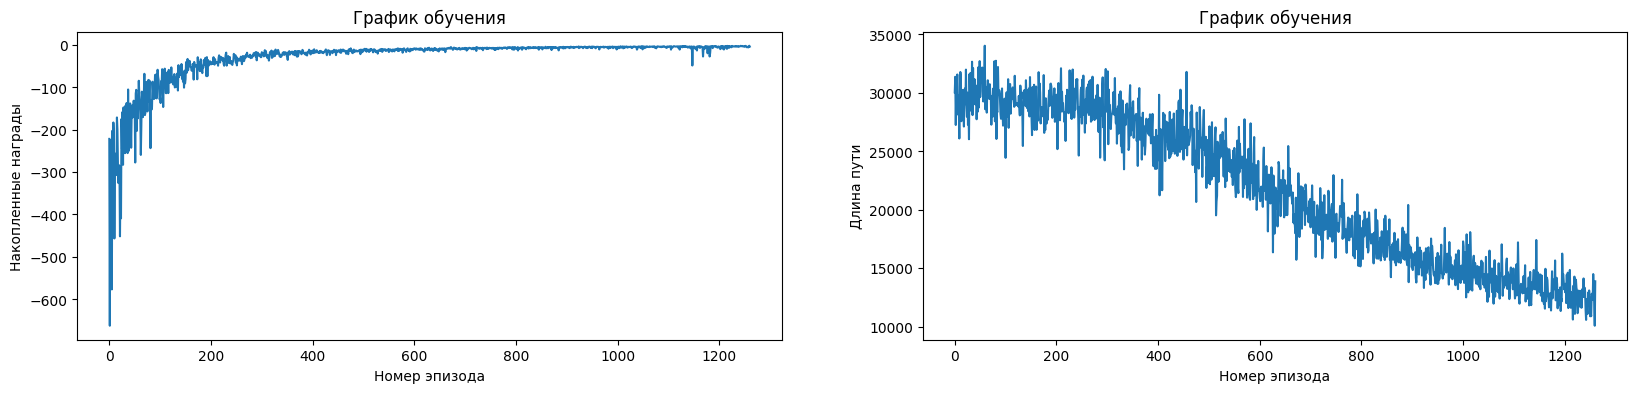

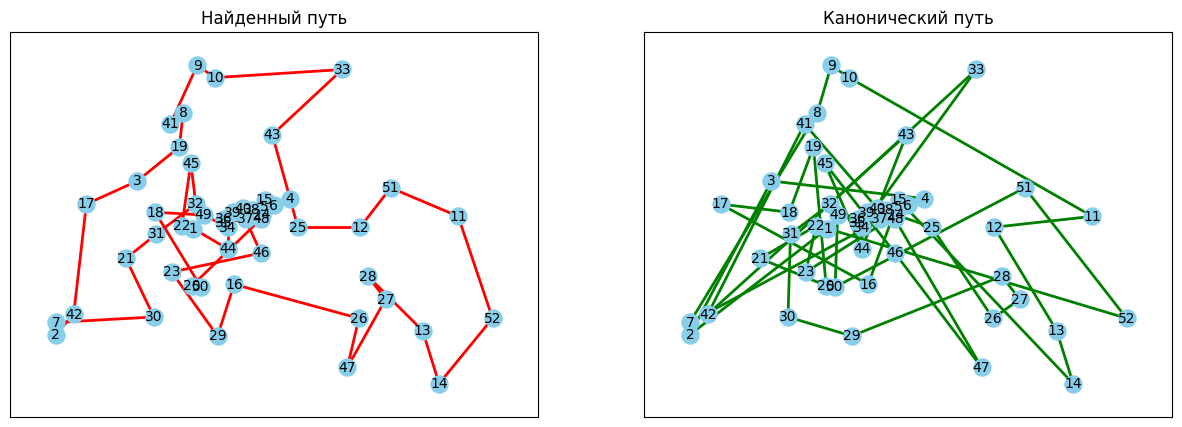

In [ ]:
idx, mx = 0, np.inf
for i in range(vec_env_train.num_envs):
    if mx > vec_env_train.envs[i].best_solution[0]:
        idx, mx = i, vec_env_train.envs[i].best_solution[0]

print_stats(vec_env_train.envs[idx])
display_learning(vec_env_train.envs[idx])
display_solution(berlin52, vec_env_train.envs[idx].best_solution[1])

 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3,891,200/3,800,000  [ 1:01:35 < 0:00:00 , 6,867 it/s ]

time = 1:04:53.288296
Всего финишей: 523
Лучшее решение: [1, 32, 22, 43, 33, 6, 44, 50, 46, 5, 4, 25, 24, 9, 41, 40, 28, 38, 49, 39, 34, 20, 30, 18, 23, 29, 35, 45, 48, 3, 7, 2, 42, 31, 16, 15, 36, 37, 21, 51, 14, 47, 26, 27, 13, 52, 12, 11, 19, 17, 10, 8, 1] , g = 17837


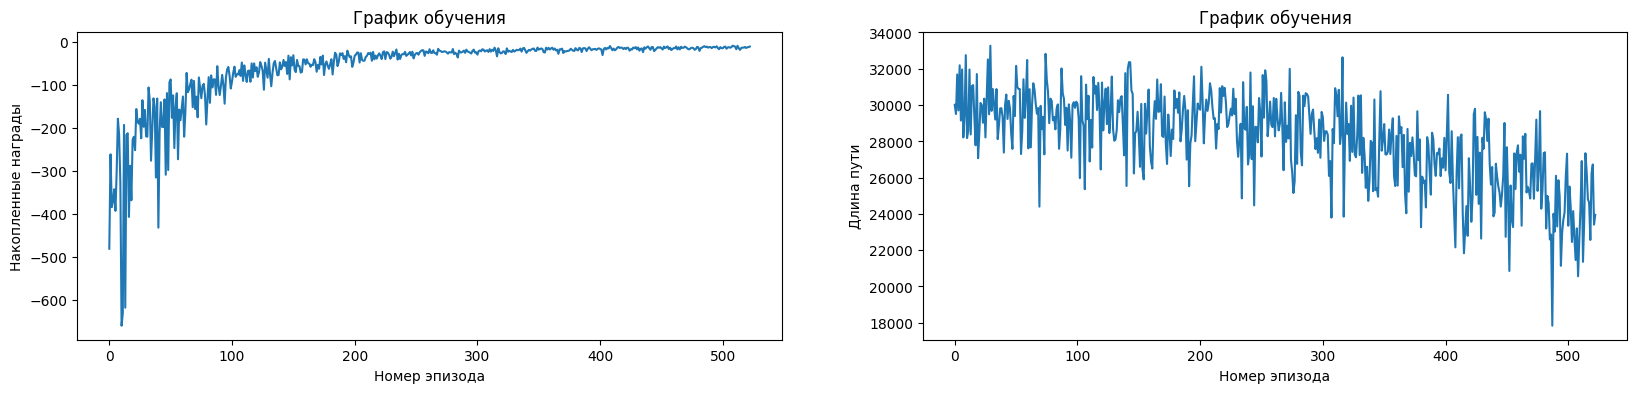

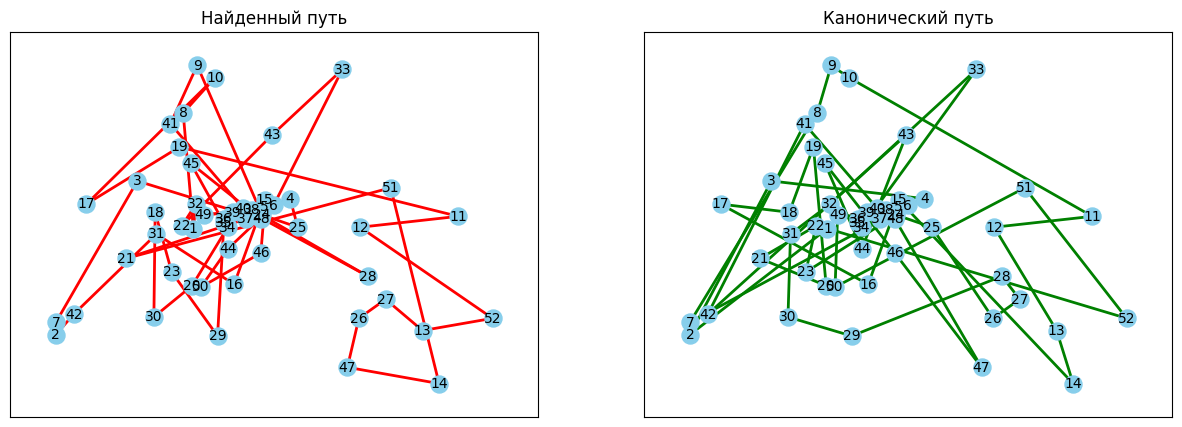

In [ ]:
vec_env_train = DummyVecEnv([lambda: MyEnv(WrapTSPLIB(berlin52))] * 100)
gra = WrapTSPLIB(berlin52)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", vec_env_train, verbose=0, device=('cuda' if torch.cuda.is_available() else 'cpu'))
model.learn(total_timesteps=3800000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

idx, mx = 0, np.inf
for i in range(vec_env_train.num_envs):
    if mx > vec_env_train.envs[i].best_solution[0]:
        idx, mx = i, vec_env_train.envs[i].best_solution[0]
print_stats(vec_env_train.envs[idx])
display_learning(vec_env_train.envs[idx])
display_solution(berlin52, vec_env_train.envs[idx].best_solution[1])

Output()

time = 1:05:34.288017
Всего финишей: 2011
Лучшее решение: [1, 31, 21, 7, 2, 42, 20, 30, 23, 50, 16, 46, 37, 40, 38, 36, 32, 34, 35, 48, 15, 4, 25, 6, 5, 24, 22, 18, 3, 17, 8, 10, 9, 41, 19, 45, 43, 33, 12, 51, 11, 52, 14, 13, 27, 28, 26, 47, 29, 39, 49, 44, 1] , g = 10000


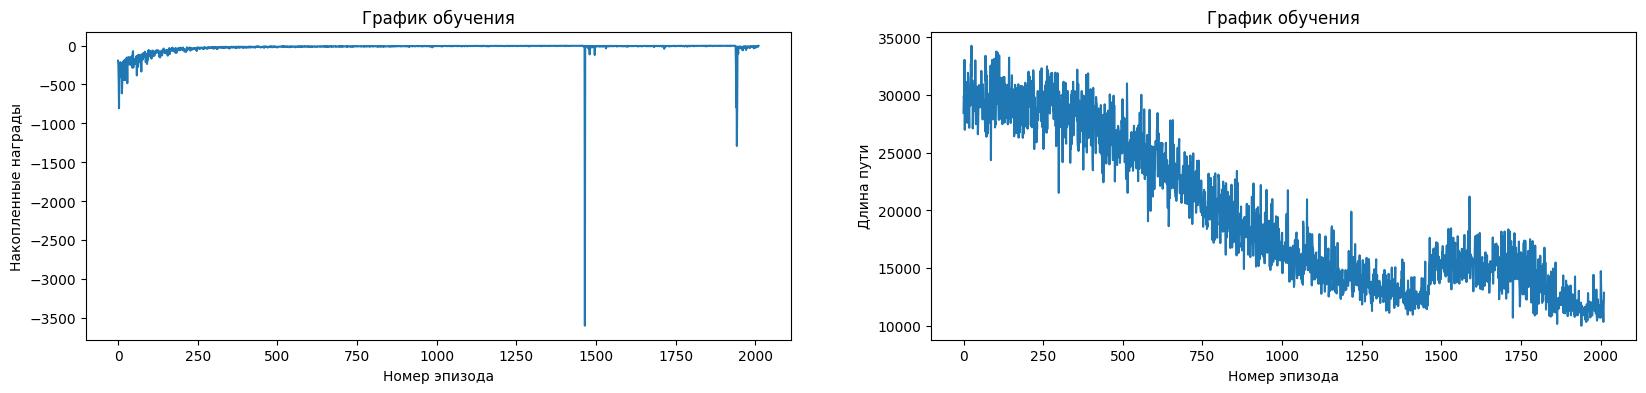

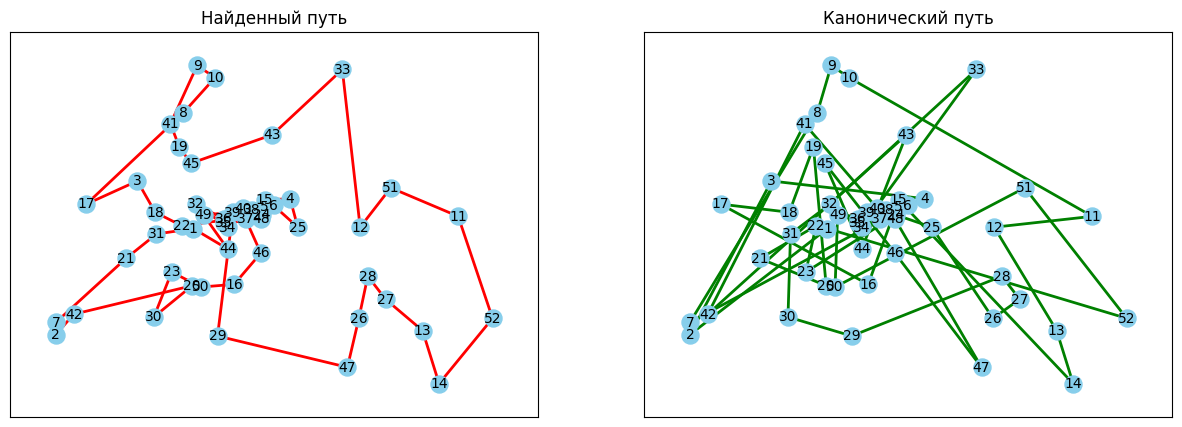

In [ ]:
vec_env_train = DummyVecEnv([lambda: MyEnv(WrapTSPLIB(berlin52))] * 25)
gra = WrapTSPLIB(berlin52)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", vec_env_train, verbose=0, device=('cuda' if torch.cuda.is_available() else 'cpu'))
model.learn(total_timesteps=3800000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

idx, mx = 0, np.inf
for i in range(vec_env_train.num_envs):
    if mx > vec_env_train.envs[i].best_solution[0]:
        idx, mx = i, vec_env_train.envs[i].best_solution[0]
print_stats(vec_env_train.envs[idx])
display_learning(vec_env_train.envs[idx])
display_solution(berlin52, vec_env_train.envs[idx].best_solution[1])

time = 1:00:48.799111
Всего финишей: 764
Лучшее решение: [1, 49, 16, 50, 20, 35, 36, 32, 31, 21, 18, 22, 38, 15, 24, 48, 43, 45, 6, 33, 11, 12, 46, 40, 23, 44, 34, 39, 5, 4, 9, 10, 8, 41, 19, 3, 17, 42, 2, 7, 30, 29, 27, 14, 52, 13, 47, 26, 28, 51, 25, 37, 1] , g = 12325


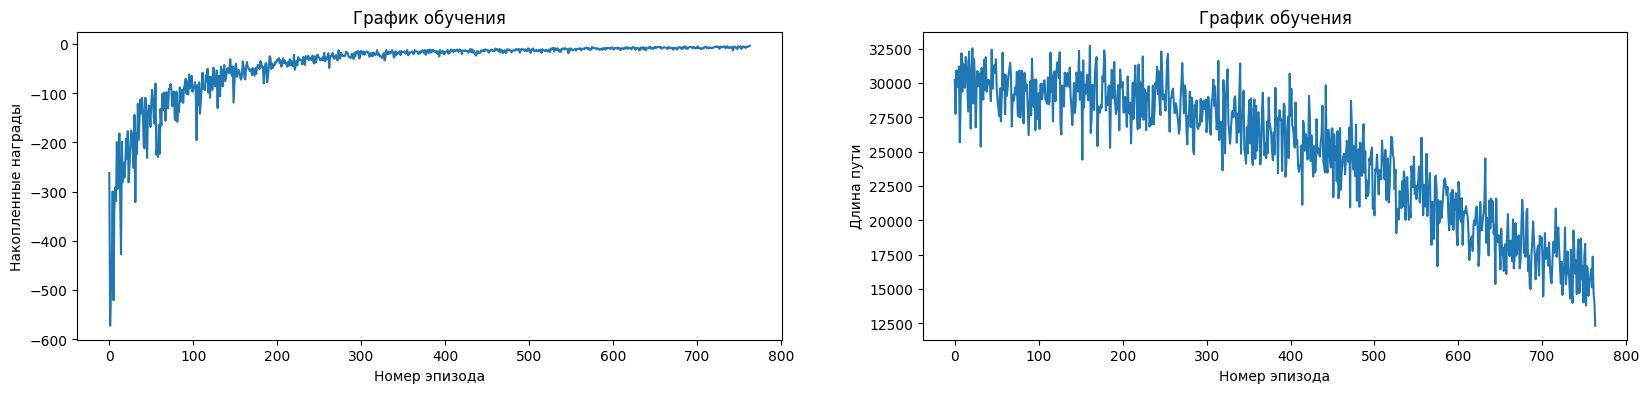

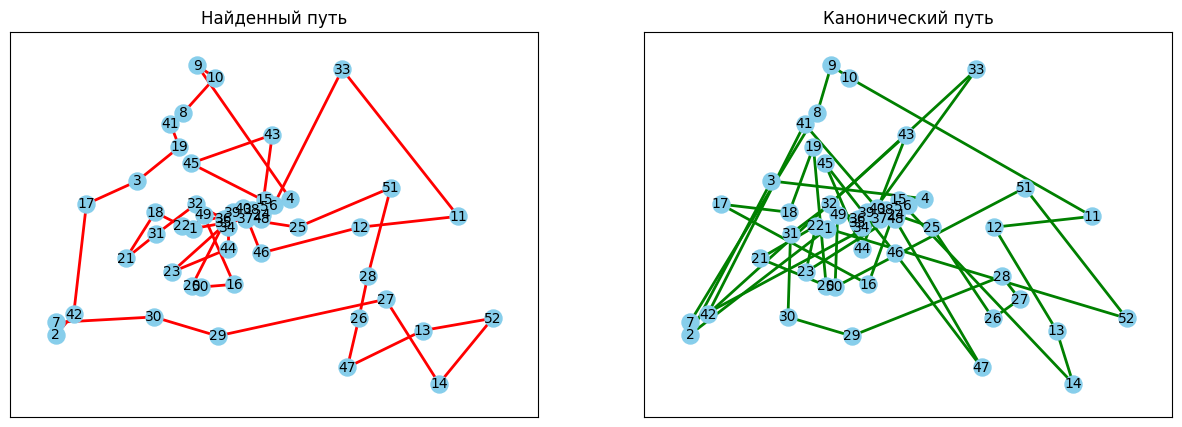

In [ ]:
vec_env_train = DummyVecEnv([lambda: MyEnv(WrapTSPLIB(berlin52))] * 75)
gra = WrapTSPLIB(berlin52)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", vec_env_train, verbose=0, device=('cuda' if torch.cuda.is_available() else 'cpu'))
model.learn(total_timesteps=3800000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

idx, mx = 0, np.inf
for i in range(vec_env_train.num_envs):
    if mx > vec_env_train.envs[i].best_solution[0]:
        idx, mx = i, vec_env_train.envs[i].best_solution[0]
print_stats(vec_env_train.envs[idx])
display_learning(vec_env_train.envs[idx])
display_solution(berlin52, vec_env_train.envs[idx].best_solution[1])

Output()

time = 1:35:28.671877
Всего финишей: 2700
Лучшее решение: [1, 5, 10, 9, 41, 8, 19, 45, 34, 40, 38, 39, 46, 25, 4, 6, 15, 48, 37, 36, 35, 3, 18, 17, 22, 31, 21, 42, 2, 7, 30, 23, 20, 50, 29, 24, 43, 33, 26, 47, 14, 13, 52, 11, 51, 12, 27, 28, 16, 44, 32, 49, 1] , g = 10759


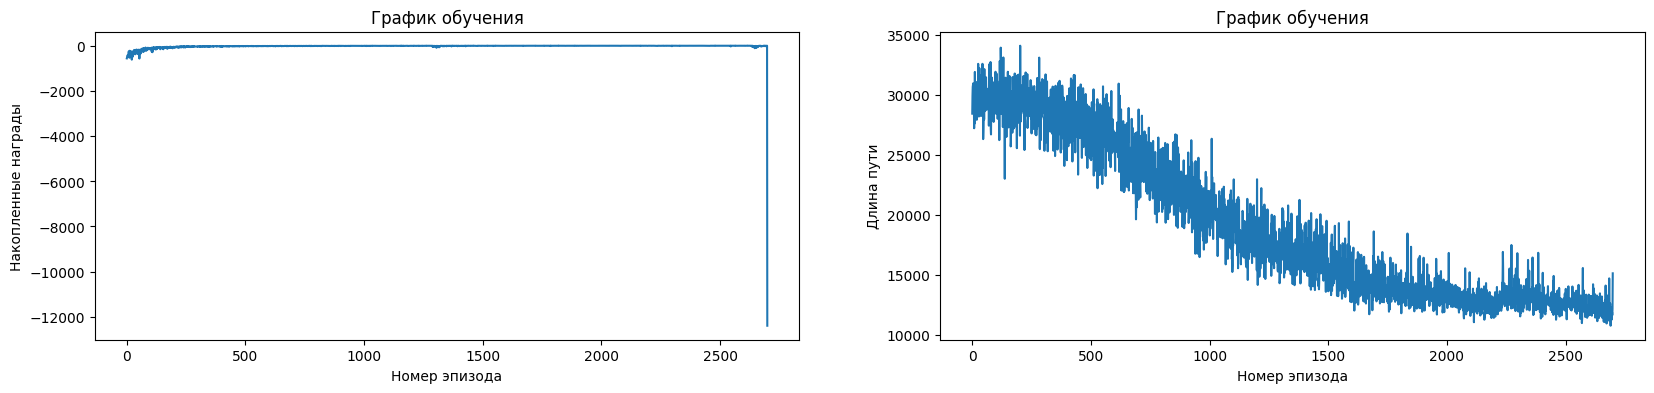

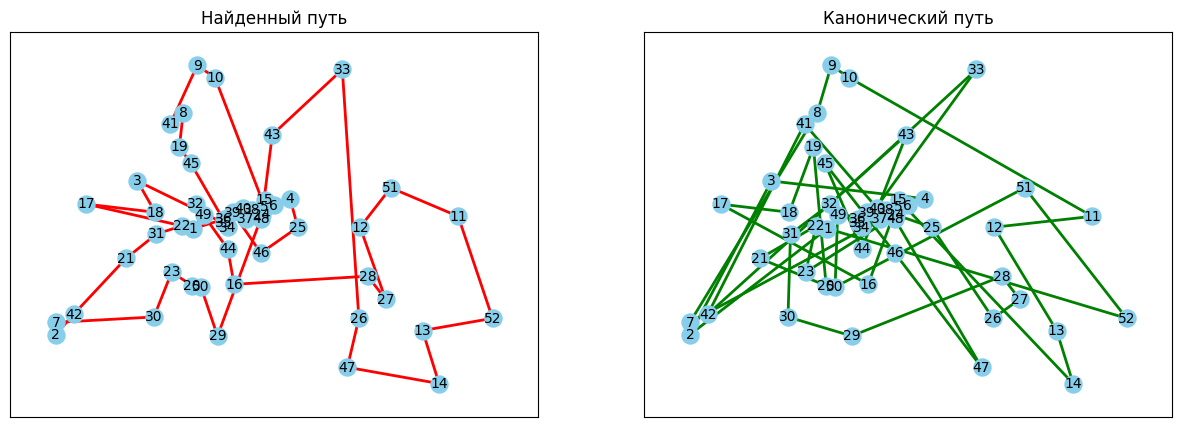

In [ ]:
vec_env_train = DummyVecEnv([lambda: MyEnv(WrapTSPLIB(berlin52))] * 13)
gra = WrapTSPLIB(berlin52)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", vec_env_train, verbose=0, device=('cuda' if torch.cuda.is_available() else 'cpu'))
model.learn(total_timesteps=3800000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)

idx, mx = 0, np.inf
for i in range(vec_env_train.num_envs):
    if mx > vec_env_train.envs[i].best_solution[0]:
        idx, mx = i, vec_env_train.envs[i].best_solution[0]
print_stats(vec_env_train.envs[idx])
display_learning(vec_env_train.envs[idx])
display_solution(berlin52, vec_env_train.envs[idx].best_solution[1])

## Обучение на berlin52

Output()

time = 0:59:17.390231
Всего финишей: 10414
Лучшее решение: [1, 21, 42, 23, 36, 40, 41, 10, 3, 25, 4, 37, 35, 5, 51, 28, 38, 16, 44, 39, 19, 45, 50, 2, 7, 20, 24, 48, 12, 11, 52, 13, 14, 26, 27, 33, 43, 9, 15, 34, 30, 31, 18, 49, 32, 22, 17, 8, 6, 46, 47, 29, 1] , g = 16797


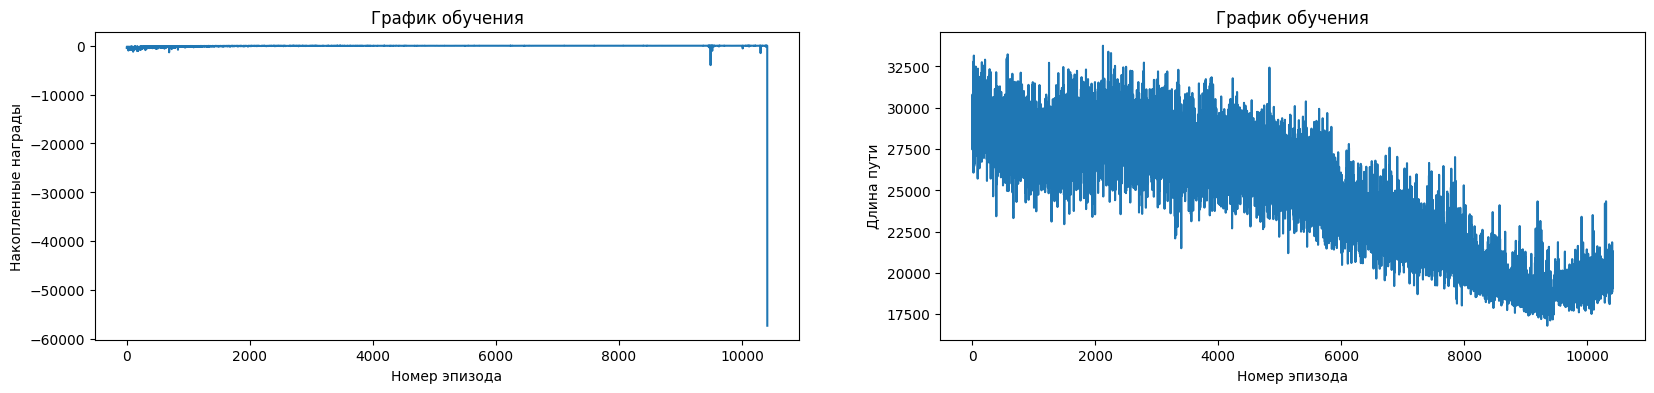

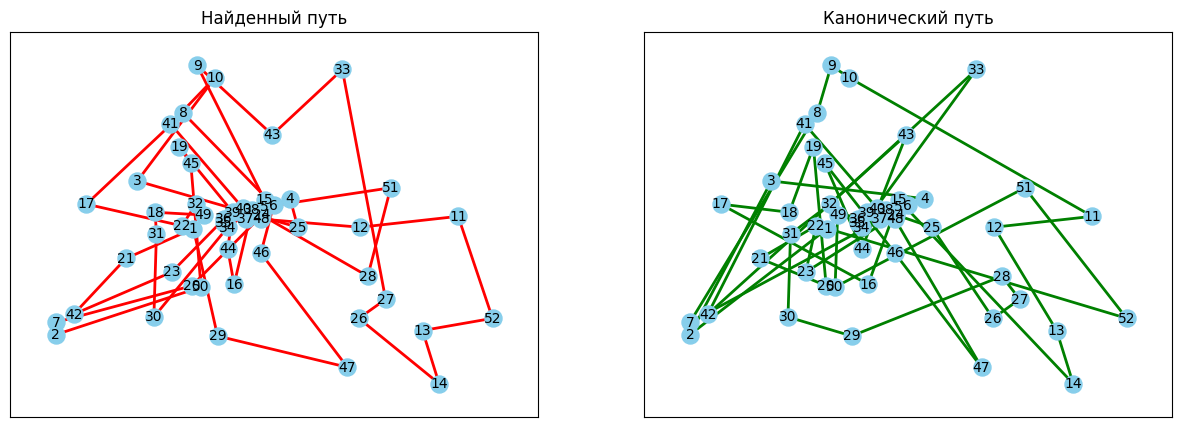

In [ ]:
gra = WrapTSPLIB(berlin52)
env = MyEnv(gra)
t1 = datetime.datetime.now()
model = PPO("MultiInputPolicy", env, verbose=0)
model.learn(total_timesteps=1600000, progress_bar=True)
t2 = datetime.datetime.now()
print("time =", t2-t1)
print_stats(env)
display_learning(env)
display_solution(berlin52, env.best_solution[1])